**Análisis de dependencias**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

seed = 1

In [2]:
weigths = np.load("weights.npy")
deps = np.load("dependencies.npy")
dists = 1/(deps+1)

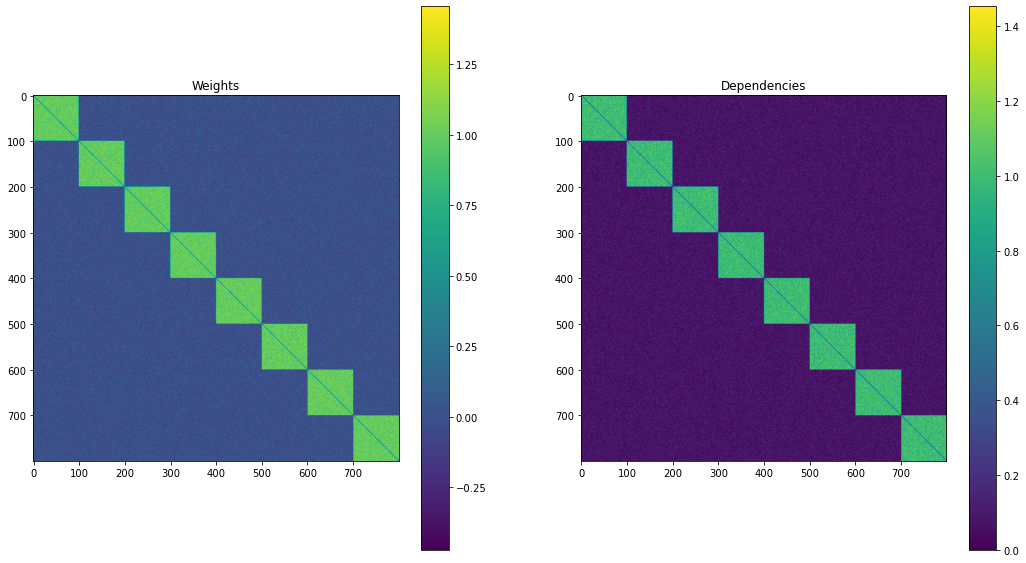

In [3]:
fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(121)
ax1.title.set_text('Weights')
plt.imshow(weigths)
plt.colorbar()

ax2 = fig.add_subplot(122)
ax2.title.set_text('Dependencies')
plt.imshow(deps)
plt.colorbar()

plt.show();

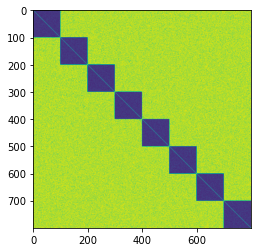

In [4]:
plt.imshow(1/(deps+1));

In [5]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from Bio.Cluster import kmedoids
from sklearn import metrics

Hemos generado los pesos de la máquina de Boltzmann, que dan lugar a las depedencias entre variables, de forma artificial. Sin embargo aplicaremos el procedimiento que seguiríamos en un caso general, en el cual intentamos analizar dichas dependencias sin conocer a qué grupo pertenece cada variable.

In [6]:
np.unique(kmedoids(dists, nclusters=8, npass=10)[0], return_counts=True)

(array([ 32, 167, 277, 323, 441, 537, 607, 794], dtype=int32),
 array([100, 100, 100, 100, 100, 100, 100, 100]))

In [7]:
# gram_matrix = np.empty(deps.shape)
# for i in range(len(gram_matrix)):
#     gram_matrix[i,:] = (deps[0,:]**2+deps[i,0]**2-deps[i,:]**2)/2

In [8]:
# w,v = np.linalg.eig(gram_matrix)

# v@np.diag(w)@v.T-gram_matrix

In [9]:
# dists = np.array(gram_matrix.shape)
# for x in np.nditer(dists, flags=['multi_index']):
#     x = gram_matrix[]

In [10]:
# shilouette_scores = []

# for i in range(2,15):
#     #km = KMeans(n_clusters=i, random_state=seed)
#     km = KMedoids(n_clusters=i, random_state=seed)
#     km.fit(gram_matrix)
    
#     shilouette_scores.append( metrics.silhouette_score(gram_matrix, km.labels_, metric='euclidean') )    

errors = []

for i in range(2,15):
    labels,error,_ = kmedoids(dists, nclusters=i, npass=500)
    
    errors.append( error )    

3   0.9243602314616189
4   0.9273951083842344
5   0.927937431908101
6   0.9257092705608259
7   0.917523401204942
8   0.914446610238575
9   0.9959862364653493
10   0.9956977940008013
11   0.9965750227386178
12   0.9961813119574191
13   0.9948059258219263
14   0.9976320403006325


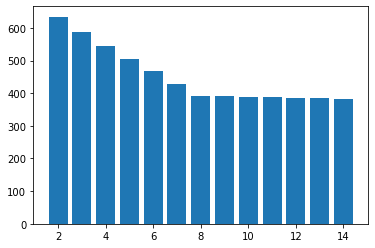

In [11]:
# plt.bar(range(2,15), shilouette_scores);
plt.bar( range(2,15), errors );
for i in range(1,13):
    print(i+2," ",errors[i]/errors[i-1])

Observamos que el error intracluster decrece hasta alcanzar 8 clústers, y no se ve afectado al aumentar dicho número de ahí en adelante. Por tanto, aplicando la técnica del codo, asumiremos que 8 es el número de grupos óptimo y será la descomposición del problema que aplicaremos en nuestro CCEA.

In [12]:
# km = KMeans(n_clusters=8, random_state=seed)
# km.fit(deps)
# km.labels_

labels = kmedoids(dists, nclusters=8, npass=500)[0]
labels

array([ 32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
        32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
        32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
        32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
        32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
        32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
        32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,  32,
        32,  32,  32,  32,  32,  32,  32,  32,  32, 167, 167, 167, 167,
       167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167,
       167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167,
       167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167,
       167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167,
       167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167,
       167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 16

In [13]:
np.unique(labels, return_counts=True)

(array([ 32, 167, 277, 323, 441, 537, 607, 794], dtype=int32),
 array([100, 100, 100, 100, 100, 100, 100, 100]))

In [14]:
indices = np.arange(len(labels))
unique_labels = np.unique(labels)

In [18]:
# clustered_variables = np.array([ indices[labels==unique_labels[i]] for i in range(8) ], dtype=np.uint32)
# clustered_variables.shape

(8, 100)

In [19]:
#np.save("clustered_variables.npy", clustered_variables)

In [21]:
#np.load("clustered_variables.npy")

In [27]:
clustered_variables = [ indices[labels==unique_labels[i]] for i in range(8) ]

with open('clustered_variables.txt', 'w') as file:
    for cluster in clustered_variables:
        for elem in cluster:
            file.write(str(elem)+" ")
        file.write('\n')
file.close()